<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset

In [1]:
# !pip install kaggle
# !kaggle datasets download -d grassknoted/asl-alphabet

In [2]:
# !unzip /content/asl-alphabet.zip

In [3]:
train_dir = "/content/asl_alphabet_train/asl_alphabet_train"
test_dir = "/content/asl_alphabet_test/asl_alphabet_test"

In [4]:
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
import os

In [5]:
def count_data(directory):
  labels = []
  items = []
  for label in os.listdir(directory):
    labels.append(label)
    items.append(len(os.listdir(os.path.join(directory, label))))

  return labels, items

['nothing', 'X', 'A', 'K', 'Z', 'V', 'space', 'I', 'O', 'S', 'del', 'L', 'C', 'N', 'G', 'Q', 'M', 'H', 'F', 'E', 'Y', 'P', 'R', 'D', 'W', 'B', 'J', 'T', 'U'] [3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]


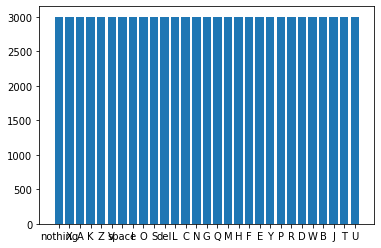

In [6]:
labels, count = count_data(train_dir)
print(labels, count)
plt.bar(labels, count);
plt.show()

In [7]:
def create_training_dataset(directory):
  data = []
  for label in labels:
    label_path = os.path.join(directory, label)
    for image in os.listdir(label_path):
      img_path = os.path.join(label_path, image)
      image = cv2.imread(img_path)
      image = cv2.resize(image, (100, 100))
      image_data = [labels.index(label), image]
      data.append(np.array(image_data))
  return np.array(data)

In [8]:
data = create_training_dataset(train_dir)
data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


(87000, 2)

In [9]:
X = []
Y = []
for y, x in data:
  X.append(x)
  Y.append(y)

X = np.array(X)
print(X.shape)
Y = np.array(Y)
print(Y.shape)

(87000, 100, 100, 3)
(87000,)


In [10]:
X, y = shuffle(X, Y, random_state=0)

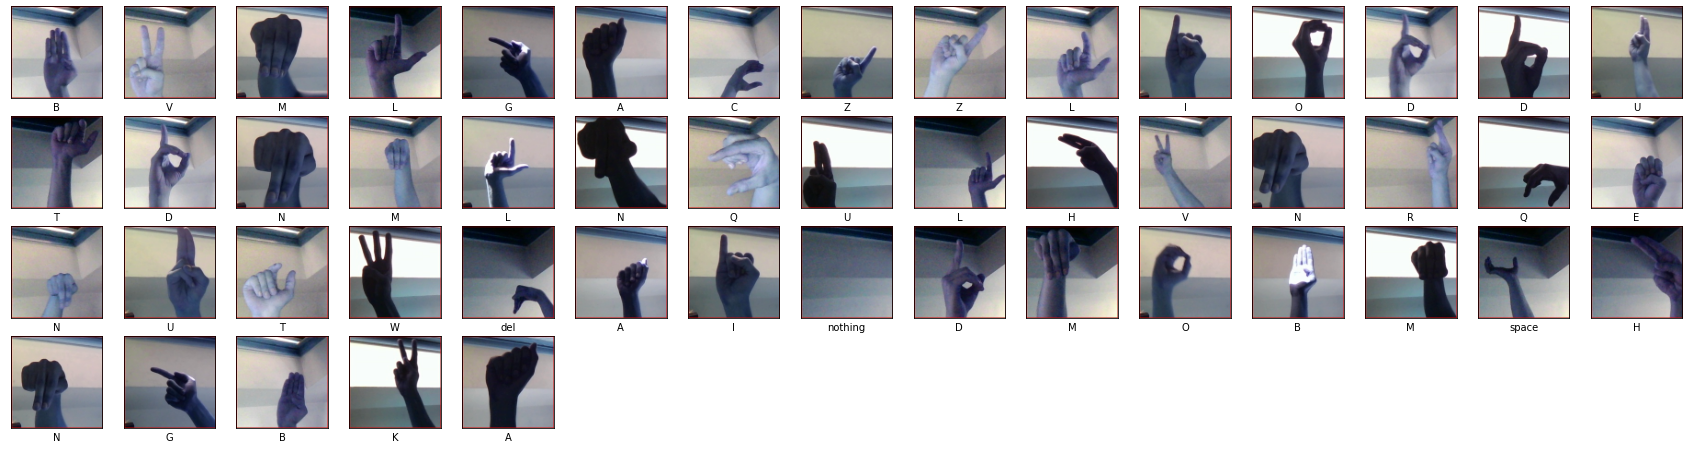

In [11]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y[i]])
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
X_train = tf.keras.utils.normalize(X_train, axis=1)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

X_train = tf.keras.utils.normalize(X_train, axis=1)

(60900, 100, 100, 3) (13050, 100, 100, 3) (13050, 100, 100, 3) (60900,) (13050,) (13050,)


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(labels)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
1904/1904 [==============================] - 58s 13ms/step - loss: 3.4300 - accuracy: 0.4339 - val_loss: 0.3623 - val_accuracy: 0.8838
Epoch 2/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.2329 - accuracy: 0.9220 - val_loss: 0.1960 - val_accuracy: 0.9411
Epoch 3/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.1618 - accuracy: 0.9490 - val_loss: 0.1900 - val_accuracy: 0.9428
Epoch 4/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.0959 - accuracy: 0.9699 - val_loss: 0.1624 - val_accuracy: 0.9569
Epoch 5/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.0983 - accuracy: 0.9726 - val_loss: 0.0589 - val_accuracy: 0.9821
Epoch 6/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.1164 - val_accuracy: 0.9670
Epoch 7/15
1904/1904 [==============================] - 24s 13ms/step - loss: 0.0669 - accuracy: 0.9816 - val_loss: 0.0971 -

408/408 - 1s - loss: 0.2348 - accuracy: 0.9762


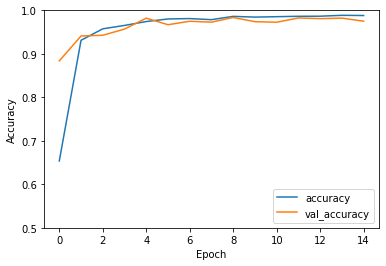

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [16]:
#Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpogf06a6f/assets
